In [85]:
import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import preprocessing
from keras.models import Model, Sequential
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
import pandas as pd
import glob
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

#####  let's have a look how the distribution of the Training dataset looks like:
      *equals Distribution :75 images in each subclass

In [75]:
def data_train():
        path_train=glob.glob('BreakHis_40XX/Train_40/*/*.png')
        
        data = pd.DataFrame(index=np.arange(0,len(path_train)), columns=['sublabel','path'])
        patient_id=[]
        sublabel=[]
        for i in range(len(path_train)):
                sublabel.append(path_train[i].split('\\')[1])
        data['path']=path_train
        data['sublabel']=sublabel
        return data

data_train=data_train()
print('Number of images in the training set is {}'.format(len(data_train)))

Number of images in the training set is 600


 Digramm shows the Distribution of  of 8 subclasses in the Training set

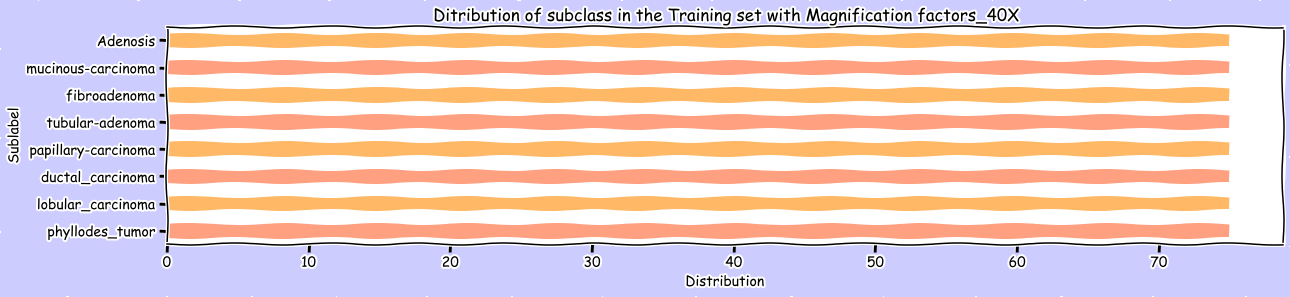

In [76]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    data_train.sublabel.value_counts().plot(kind='barh',color=['#ffa180','#ffb865'],label='female')
    plt.title('Ditribution of subclass in the Training set with Magnification factors_40X')
    plt.xlabel('Distribution')
    plt.ylabel('Sublabel')
    
    plt.show()

In [77]:
def data_test():
        path_valid = glob.glob('BreakHis_40XX/Test_40/*/*.png', recursive=True)

        data = pd.DataFrame(index=np.arange(0, len(path_valid )), columns=['sublabel', 'path'])
        patient_id = []
        sublabel = []
        for i in range(len(path_valid )):
            sublabel.append(path_valid [i].split('\\')[1])
        data['path'] = path_valid
        data['sublabel'] = sublabel
        return data
data_test=data_test()
print('Number of images in the testing set is {}'.format(len(data_test)))

Number of images in the testing set is 317


 Digramm shows the Distribution of  of 8 subclasses in the Testing set

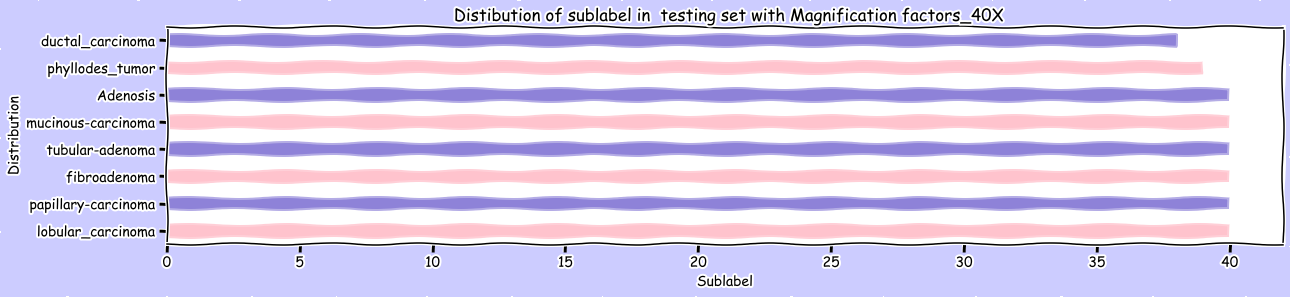

In [78]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    data_test.sublabel.value_counts().plot(kind='barh',color=['#ffc0cbc0','#6a5acd80'],label='female')
    plt.title(' Distibution of sublabel in  testing set with Magnification factors_40X')
    plt.xlabel('Sublabel')
    plt.ylabel('Distribution')
    
    plt.show()

In [7]:
def data_train():
    train_images=[]
    train_labels=[]
    SIZE=128
    i=0
    for directory_path in glob.glob("BreakHis_40XX/Train_40/*"):
        label = directory_path.split('\\')[-1]
        for img_path  in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path)       
                img = cv2.resize(img, (SIZE, SIZE))
                print(img_path)
                train_images.append(img)
                train_labels.append(label)
            except:
                break
    return train_images,train_labels
        
train_images,train_labels=data_train()

BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-002.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-003.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-004.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-005.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-006.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-007.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-008.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-009.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-010.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-011.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-012.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-013.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-014.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-015.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-016.png
BreakHis_40XX/Train_40\Adenosis\SOB_B_A-14-22549AB-40-017.png
BreakHis

BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-007.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-008.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-009.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-010.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-011.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-012.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-013.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-014.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-015.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-016.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-017.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-018.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-019.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC-14-9461-40-020.png
BreakHis_40XX/Train_40\ductal_carcinoma\SOB_M_DC

BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-018.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-019.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-020.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-021.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-022.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-023.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-024.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-025.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-026.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-027.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-028.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-029.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-030.png
BreakHis_40XX/Train_40\lobular_carcinoma\SOB_M_LC-14-13412-40-031.png
BreakHis_40XX/Train_

BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-018.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-019.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-020.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-12465-40-021.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-15687B-40-001.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-15687B-40-002.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-15687B-40-003.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-15687B-40-004.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-15687B-40-005.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-15687B-40-006.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-15687B-40-007.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-15687B-40-008.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-15687B-40-009.png
BreakHis_40XX/Train_40\papillary-carcinoma\SOB_M_PC-14-

BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-030.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-031.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-22704-40-032.png
BreakHis_40XX/Train_40\phyllodes_tumor\SOB_B_PT-14-29315EF-40-008.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-001.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-002.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-003.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-004.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-005.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-006.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-007.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-008.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-009.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_TA-14-13200-40-010.png
BreakHis_40XX/Train_40\tubular-adenoma\SOB_B_T

In [79]:
def data_test():
    test_images=[]
    test_labels=[]
    SIZE=128
    for directory_path in glob.glob("BreakHis_40XX/Test_40/*"):
        label = directory_path.split('\\')[-1]
        for img_path in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path) 
                img = cv2.resize(img, (SIZE, SIZE))
                test_images.append(img)
                test_labels.append(label)
            except:
                break
    return test_images,test_labels
        
test_images,test_labels=data_test()
print(len(test_labels))

317


convert images un und sublabel into array:

In [80]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)





transform String labels into integers labels

In [81]:

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)





In [82]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train=train_images
y_train=train_labels_encoded
x_test=test_images
y_test = test_labels_encoded



transform pixel in number between [0,1]

In [83]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [84]:
SIZE=128
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [86]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [87]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
X_for_test = X_test_features

In [93]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_test_features , y_test)]

model_xgboost.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.47292
[1]	validation_0-auc:0.49066
[2]	validation_0-auc:0.50643
[3]	validation_0-auc:0.49747
[4]	validation_0-auc:0.50720
[5]	validation_0-auc:0.49001
[6]	validation_0-auc:0.49445
[7]	validation_0-auc:0.49128
[8]	validation_0-auc:0.48811
[9]	validation_0-auc:0.48527
[10]	validation_0-auc:0.48143
[11]	validation_0-auc:0.47969
[12]	validation_0-auc:0.47114
[13]	validation_0-auc:0.47560
[14]	validation_0-auc:0.47485


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [94]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model_xgboost.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

#Print overall accuracy
#from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

Accuracy =  0.1640378548895899


In [95]:
y_train_pred = model_xgboost.predict_proba(X_for_training)
y_valid_pred = model_xgboost.predict_proba(X_test_features)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

AUC Train: 0.9935
AUC Valid: 0.5085


In [97]:
learning_rate_list = [0.02, 0.05, 0.1,0.01]
max_depth_list = [2, 3, 5,30]
n_estimators_list = [1000, 2000, 3000,5000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

64


{'learning_rate': [0.02, 0.05, 0.1, 0.01],
 'max_depth': [2, 3, 5, 30],
 'n_estimators': [1000, 2000, 3000, 5000]}

In [ ]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y_train, model.predict_proba(X_for_training),multi_class="ovr")

model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=4,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X_for_training, y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits
[CV 1/4] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.983, test=0.983) total time=  36.2s
[CV 2/4] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.992, test=0.992) total time=  40.8s
[CV 3/4] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.985, test=0.985) total time=  42.8s
[CV 4/4] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.991, test=0.991) total time=  47.6s
[CV 1/4] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.985, test=0.985) total time= 1.4min
[CV 2/4] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.993, test=0.993) total time= 1.6min
[CV 3/4] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.987, test=0.987) total time= 1.7min
[CV 4/4] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.991, test=0.991) total time= 1.6min
[C

In [ ]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

In [ ]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

In [ ]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & (df_cv_results['param_max_depth']==2),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [ ]:
model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.02,
                                          max_depth=5,
                                          n_estimators=1000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_for_training, y_train),(X_test_features, y_test)]

model_xgboost_fin.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

In [ ]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_train_pred = model_xgboost_fin.predict_proba(X_for_training)
y_valid_pred = model_xgboost_fin.predict_proba(X_test_features)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

In [38]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_for_training = features 




X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)



X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))


from sklearn.metrics import confusion_matrix
cm_grid = confusion_matrix(test_labels, prediction)
ax=sns.heatmap(cm_grid, annot=True)
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Breast cancer  Category')
ax.set_ylabel('Actual Breast cancer Category ')
ax.xaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])
ax.yaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])



#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])



print(metrics.classification_report(test_labels, prediction, digits=3))






Tp_0=cm_grid[0,0]
Tp_1=cm_grid[1,1]
Tp_2=cm_grid[2,2]
Tp_3=cm_grid[3,3]
Tp_4=cm_grid[4,4]
Tp_5=cm_grid[5,5]
Tp_6=cm_grid[6,6]
Tp_7=cm_grid[7,7]

FN_0=cm_grid[0,1]+cm_grid[0,2]+cm_grid[0,3]+cm_grid[0,4]+cm_grid[0,5]+cm_grid[0,6]+cm_grid[0,7]
FN_1=cm_grid[1,0]+cm_grid[1,2]+cm_grid[1,3]+cm_grid[1,4]+cm_grid[1,5]+cm_grid[1,6]+cm_grid[1,7]
FN_2=cm_grid[2,0]+cm_grid[2,1]+cm_grid[2,3]+cm_grid[2,4]+cm_grid[2,5]+cm_grid[2,6]+cm_grid[2,7]
FN_3=cm_grid[3,0]+cm_grid[3,1]+cm_grid[3,2]+cm_grid[3,4]+cm_grid[3,5]+cm_grid[3,6]+cm_grid[3,7]
FN_4=cm_grid[4,0]+cm_grid[4,1]+cm_grid[4,2]+cm_grid[4,3]+cm_grid[4,5]+cm_grid[4,6]+cm_grid[4,7]
FN_5=cm_grid[5,0]+cm_grid[5,1]+cm_grid[5,2]+cm_grid[5,3]+cm_grid[5,4]+cm_grid[5,6]+cm_grid[5,7]
FN_6=cm_grid[6,0]+cm_grid[6,1]+cm_grid[6,2]+cm_grid[6,3]+cm_grid[6,4]+cm_grid[6,5]+cm_grid[6,7]
FN_7=cm_grid[7,0]+cm_grid[7,1]+cm_grid[7,2]+cm_grid[7,3]+cm_grid[7,4]+cm_grid[7,5]+cm_grid[7,6]



Fp_0=cm_grid[1,0]+cm_grid[2,0]+cm_grid[3,0]+cm_grid[4,0]+cm_grid[5,0]+cm_grid[6,0]+cm_grid[7,0]
Fp_1=cm_grid[0,1]+cm_grid[2,1]+cm_grid[3,1]+cm_grid[4,1]+cm_grid[5,1]+cm_grid[6,1]+cm_grid[7,1]
Fp_2=cm_grid[0,2]+cm_grid[1,2]+cm_grid[3,2]+cm_grid[4,2]+cm_grid[5,2]+cm_grid[6,2]+cm_grid[7,2]
Fp_3=cm_grid[0,3]+cm_grid[1,3]+cm_grid[2,3]+cm_grid[4,3]+cm_grid[5,3]+cm_grid[6,3]+cm_grid[7,3]
Fp_4=cm_grid[0,4]+cm_grid[1,4]+cm_grid[2,4]+cm_grid[3,4]+cm_grid[5,4]+cm_grid[6,4]+cm_grid[7,4]
Fp_5=cm_grid[0,5]+cm_grid[1,5]+cm_grid[2,5]+cm_grid[3,5]+cm_grid[4,5]+cm_grid[6,5]+cm_grid[7,5]
Fp_6=cm_grid[0,6]+cm_grid[1,6]+cm_grid[2,6]+cm_grid[3,6]+cm_grid[4,6]+cm_grid[5,6]+cm_grid[7,6]
Fp_7=cm_grid[0,7]+cm_grid[1,7]+cm_grid[2,7]+cm_grid[3,7]+cm_grid[4,7]+cm_grid[5,7]+cm_grid[6,7]

l=[]
for i in range(len(cm_grid)):
    for j in range(len(cm_grid)):
        l.append(cm_grid[i,j])
        
    
Tn_0=sum(l)-Tp_0-FN_0-Fp_0
Tn_1=sum(l)-Tp_1-FN_1-Fp_1
Tn_2=sum(l)-Tp_2-FN_2-Fp_2
Tn_3=sum(l)-Tp_3-FN_3-Fp_3
Tn_4=sum(l)-Tp_4-FN_4-Fp_4
Tn_5=sum(l)-Tp_5-FN_5-Fp_5
Tn_6=sum(l)-Tp_6-FN_6-Fp_6
Tn_7=sum(l)-Tp_7-FN_7-Fp_7

TP=[Tp_0,Tp_1,Tp_2,Tp_3,Tp_4,Tp_5,Tp_6,Tp_7]
FN=[FN_0,FN_1,FN_2,FN_3,FN_4,FN_5,FN_6,FN_7]
FP=[Fp_0,Fp_1,Fp_2,Fp_3,Fp_4,Fp_5,Fp_6,Fp_7]
TN=[Tn_0,Tn_1,Tn_1,Tn_2,Tn_3,Tn_4,Tn_6,Tn_7]

df=pd.DataFrame(index=np.arange(0,8),columns=['TP','FN','FP','TN'])
df['TP']=TP
df['FN']=FN
df['FP']=FP
df['TN']=TN
print(df)



df.rename(index={0:'A',1:'DC',2:'FB',3:'LC',4:'MC',5:'PC',6:'PT',7:'TA'},inplace=True)

df





from bokeh.io import output_file, show
from bokeh.plotting import figure
sublabel=['A','DC','FB','LC','MC','PC','PT','TA']
ds=['TP','FN','FP','TN']
colors = ["#c9d9d3", "#718dbf", "#e84d60",'#ffa180']

data = {'sublabel' : sublabel,
        'TP'   : [30,16,32,20,27,32,33,26],
        'FN'   : [12,23,8,12,13,8,7,14],
        'FP'   : [10,19,14,13,13,8,6,14],
        'TN'  :[261,255,255,259,268,260,267,259]  
       }
p = figure(x_range=sublabel, height=250, title="Number of TP,FN,FP,TN with Magnification factors 40X",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(ds, x='sublabel', width=0.9, color=colors, source=data,
             legend_label=ds)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)






prediction = model.predict(X_test_features)
from sklearn.preprocessing import OneHotEncoder
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)
print(roc_auc_score(y_test,model.predict_proba(X_test_features),multi_class='ovo'))




proba =model.predict_proba(X_test_features)
predicted_class0=proba[:,0]
predicted_class1=proba[:,1]
predicted_class2=proba[:,2]
predicted_class3=proba[:,3]
predicted_class4=proba[:,4]
predicted_class5=proba[:,5]
predicted_class6=proba[:,6]
predicted_class7=proba[:,7]
print('  predicted probality for class 0 is : \n {}'.format(predicted_class0[:]))
print('  predicted probality for class 1 is : \n {}'.format(predicted_class1[:]))
print('  predicted probality for class 2 is : \n {}'.format(predicted_class2[:]))
print('  predicted probality for class 3 is : \n {}'.format(predicted_class3[:]))
print('  predicted probality for class 4 is : \n {}'.format(predicted_class4[:]))
print('  predicted probality for class 5 is : \n {}'.format(predicted_class5[:]))
print('  predicted probality for class 6 is : \n {}'.format(predicted_class6[:]))
print('  predicted probality for class 7 is : \n {}'.format(predicted_class7[:]))

In [125]:
roc_auc_score(y_test, model.predict_proba(X_test_features), multi_class='ovr')

0.9411910033659145

In [215]:


#Now predict using the trained RF model. 
#prediction = model.predict(X_test_features)
#Inverse le transform to get original label back. 
#prediction = le.inverse_transform(prediction)

#Print overall accuracy
#from sklearn import metrics
#print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

In [43]:
feature_extractor_valid=VGG_model.predict(x_valid)

features_valid = feature_extractor_valid.reshape(feature_extractor_valid.shape[0], -1)

X_for_valid = features_valid

In [46]:
import sklearn.metrics as metrics